# Task 3
## CAR PRICE PREDICTION WITH MACHINE LEARNING

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.


In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [9]:
# Load the dataset
data = pd.read_csv('car data.csv') 
print(data.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [10]:
# Data preprocessing
# Assuming 'Car_Name', 'Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Transmission', 'Owner' as features and 'Selling_Price' as the target variable
X = data[['Car_Name', 'Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Transmission', 'Owner']]
y = data['Selling_Price']

In [12]:
# Encoding categorical variables
X = pd.get_dummies(X)

In [13]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Model training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 1.0953617019515245
Mean Squared Error (MSE): 2.3352460076219406
Root Mean Squared Error (RMSE): 1.5281511730263928


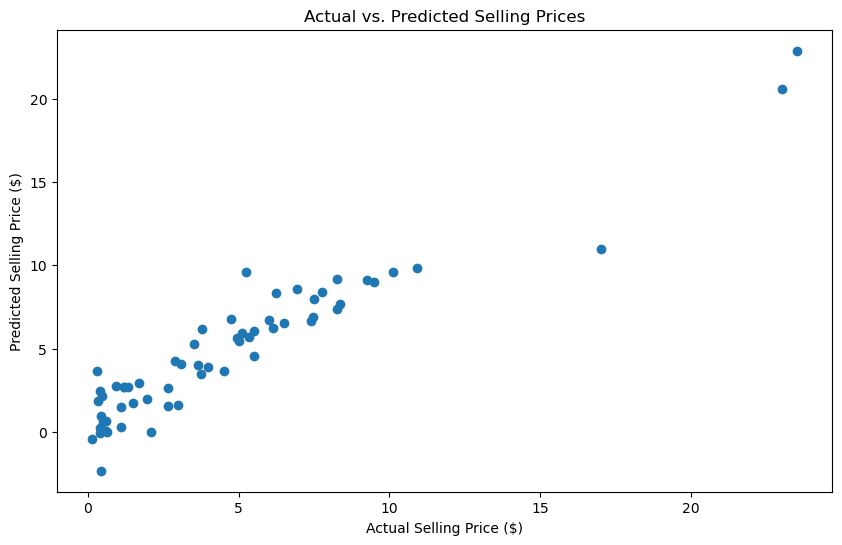

In [36]:
# Visualizing the actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Selling Price ($)')
plt.ylabel('Predicted Selling Price ($)')
plt.title('Actual vs. Predicted Selling Prices')
plt.show()

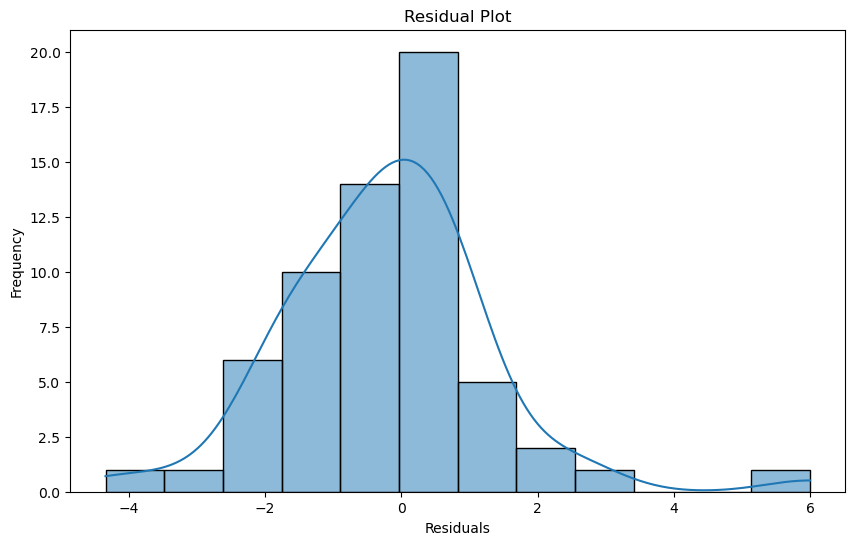

In [18]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Plot')
plt.show()

C:\Users\ALRWOAD LABTOB\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


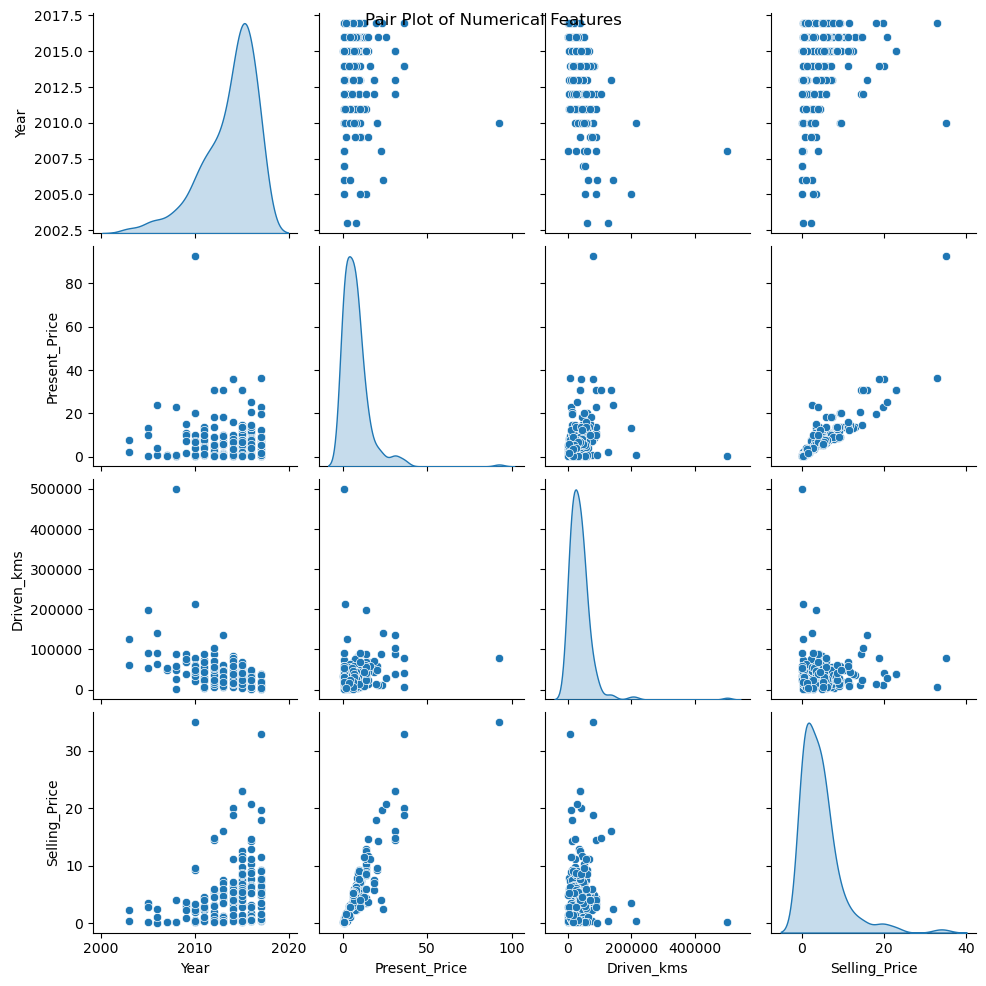

In [42]:
import seaborn as sns

# Combine X_train and y_train into a single DataFrame for pairplot
train_data = X_train.copy()
train_data['Selling_Price'] = y_train

# Select numerical features for pair plot
numerical_features = ['Year', 'Present_Price', 'Driven_kms', 'Selling_Price']

# Create pair plot
sns.pairplot(train_data[numerical_features], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features')
plt.show()



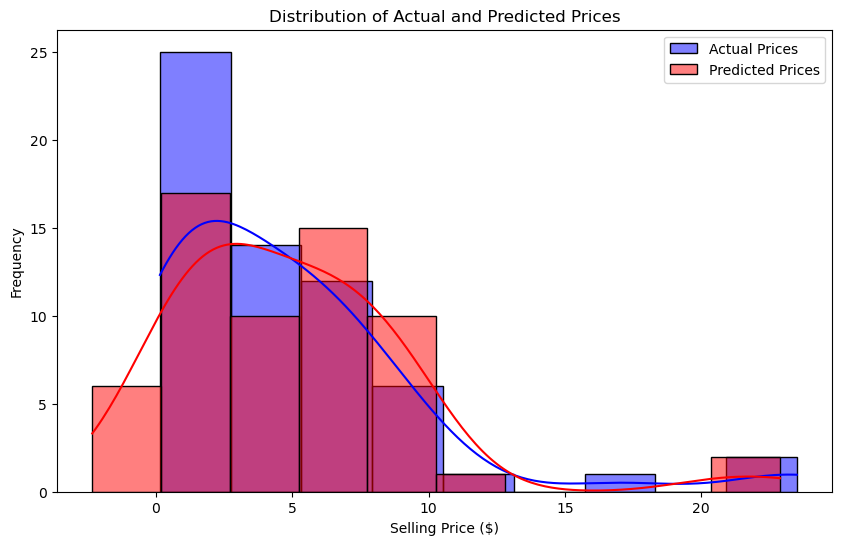

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Actual Prices', kde=True)
sns.histplot(y_pred, color='red', label='Predicted Prices', kde=True)
plt.xlabel('Selling Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted Prices')
plt.legend()
plt.show()


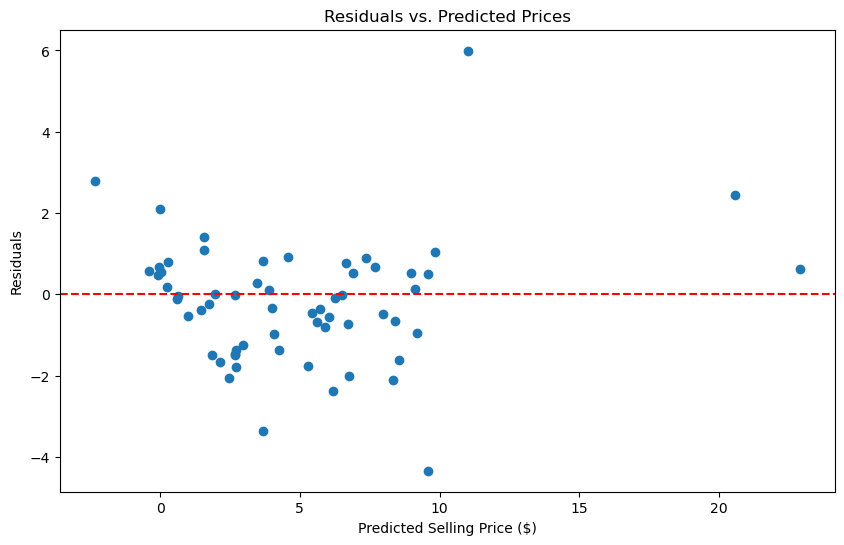

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Selling Price ($)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices')
plt.show()


In [31]:
# Extracting the unique car names from the training data
car_names = data['Car_Name'].unique()

# Create a dictionary to hold the example data
example_data = {}

# Initialize car name features to 0
for name in car_names:
    example_data[f'Car_Name_{name}'] = [0]

# Update other features with example values
example_data.update({'Year': [2014], 'Present_Price': [5.59], 'Driven_kms': [27000], 'Fuel_Type_Petrol': [1], 'Fuel_Type_Diesel': [0], 'Fuel_Type_CNG': [0], 'Transmission_Manual': [1], 'Transmission_Automatic': [0], 'Owner': [0]})

# Create DataFrame from example data
example_df = pd.DataFrame(example_data)

# Align columns to match the order of columns in the training data
example_df = example_df[X_train.columns]

# Predict selling price
predicted_price = model.predict(example_df)
print(f'Predicted Selling Price: ${predicted_price[0]}')



Predicted Selling Price: $3.4404817703887147
